In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss
import nsfg
import thinkstats2
import thinkplot

In [2]:
resp = nsfg.ReadFemResp()

# Q1

In [3]:
resp["hieduc"].value_counts()

9     2171
10    1624
12    1171
5      806
11     553
6      450
7      415
13     295
15      92
14      34
8       32
Name: hieduc, dtype: int64

In [4]:
school = resp[resp["hieduc"].isin([5,6,7,8,9,10])]
university = resp[resp["hieduc"].isin([11,12,13,14,15])]


In [5]:
school["agemomb1"].describe()

count    5498.000000
mean        3.827210
std        10.677571
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        96.000000
Name: agemomb1, dtype: float64

# Q2

In [6]:
school = school[school["agemomb1"] < 6]
university = university[university["agemomb1"] < 6]

In [7]:
school_p = school.agemomb1
school_p_dropna = school_p.dropna()
 
universit_p = university.agemomb1
university_p_dropna = universit_p.dropna()

school_pmf = thinkstats2.Pmf(school_p_dropna, label='School')
university_pmf = thinkstats2.Pmf(university_p_dropna, label='University')

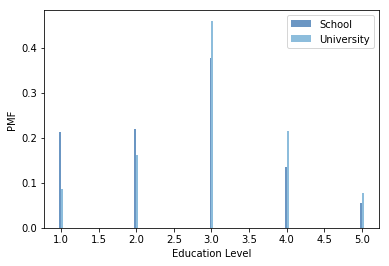

In [8]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(school_pmf, align='right', width=width)
thinkplot.Hist(university_pmf, align='left', width=width)
thinkplot.Config(xlabel='Education Level', ylabel='PMF')

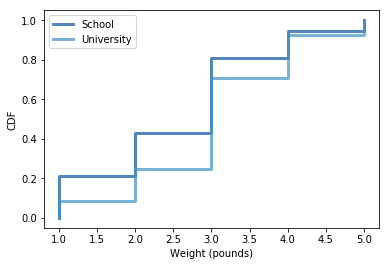

In [9]:
school_cdf = thinkstats2.Cdf(school_p_dropna, label='School')
university_cdf = thinkstats2.Cdf(university_p_dropna, label='University')

thinkplot.PrePlot(2)
thinkplot.Cdfs([school_cdf, university_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

# Q3

0.12716445329105003
0.05640542173863464
-0.0835601457783593
-0.07940429084393757
-0.020605438407387815


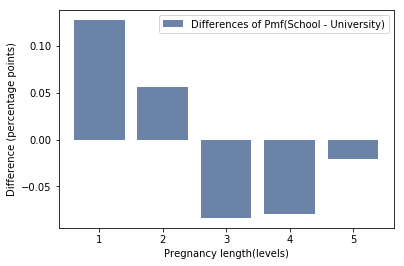

In [12]:
levels = range(1,6)
diffs = []
for level in levels:
    p1 = school_pmf.Prob(level)
    p2 = university_pmf.Prob(level)
    diff = (p1 - p2)
    print(diff)
    diffs.append(diff)

thinkplot.Bar(levels, diffs, label="Differences of Pmf(School - University)")
thinkplot.Config(xlabel='Pregnancy length(levels)', ylabel='Difference (percentage points)')

# Q4

In [16]:
school_cdf = thinkstats2.Cdf(school_p_dropna, label='school')
university_cdf = thinkstats2.Cdf(university_p_dropna, label='university')
print("Probabilty of Women who is younger than 18 is in school dataframe ", school_cdf.Prob(1))
print("Probabilty of Women who is younger than 18 is in university dataframe ", university_cdf.Prob(1))


Probabilty of Women who is younger than 18 is in school dataframe 0.2123110947290822
Probabilty of Women who is younger than 18 is in university dataframe 0.08514664143803216


In [22]:
print("Percentile of Women who is younger than 18 is in school dataframe", school_cdf.PercentileRank(1))
print("Percentile of Women who not younger than 18 is in school dataframe", (100-school_cdf.PercentileRank(1)))
print("Probabilty of Women who is younger than 18 is in university dataframe", university_cdf.PercentileRank(1))
print("Percentile of Women who not younger than 18 is in university dataframe", (100-university_cdf.PercentileRank(1)))

Percentile of Women who is younger than 18 is in school dataframe 21.23110947290822
Percentile of Women who not younger than 18 is in school dataframe 78.76889052709178
Probabilty of Women who is younger than 18 is in university dataframe 8.514664143803216
Percentile of Women who not younger than 18 is in university dataframe 91.48533585619678


In [21]:
education_degree = resp['hieduc']
school = education_degree[education_degree < 11]
university = education_degree[education_degree >= 11]
school

0        6
1       10
2        9
3        5
4        6
5        5
6        6
7        9
8        9
9       10
10       9
11       9
12       9
13       5
14       9
15       9
16       6
17       9
18       6
19       6
20      10
21       6
23      10
24       9
25       9
26      10
27      10
28       9
29       9
30      10
        ..
7600    10
7602    10
7608    10
7609     5
7610     9
7611     5
7612     9
7613     7
7615     5
7616    10
7620     9
7621     9
7622     7
7623     9
7624    10
7625    10
7626    10
7627    10
7628     7
7630     9
7631    10
7632     9
7633    10
7634     9
7635     9
7636     7
7637     9
7639     7
7641     6
7642    10
Name: hieduc, Length: 5498, dtype: int64